<a href="https://colab.research.google.com/github/dung18520632/Deep_Learning-Python-Basics/blob/main/Planar%20data%20classification%20with%20one%20hidden%20layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

In [80]:
X, Y = load_planar_dataset()

In [81]:
print("The shape of X",X.shape)
print("The shape of Y",Y.shape)
m=X.shape[1]


The shape of X (2, 400)
The shape of Y (1, 400)


In [82]:
cfs=sklearn.linear_model.LogisticRegression()
model=cfs.fit(X.T,Y.T)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
Y_prec=model.predict(X.T)
print("Độ chính xác",float((np.dot(Y,Y_prec)+np.dot(1-Y,1-Y_prec)))/float(Y.size)*100)

Độ chính xác 47.0


Text(0.5, 1.0, 'Logistic Regression')

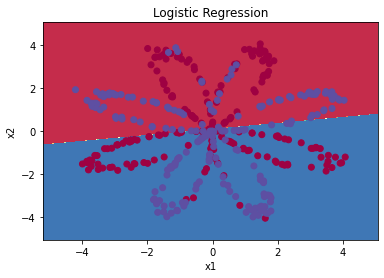

In [84]:
plot_decision_boundary(lambda x: cfs.predict(x), X, Y)
plt.title("Logistic Regression")

In [85]:
def layer_sizes(X, Y):
  n_x=X.shape[0]
  n_h=4
  n_y=Y.shape[0]
  return (n_x,n_h,n_y)

In [86]:
X_assess, Y_assess = layer_sizes_test_case()
n_x,n_h,n_y=layer_sizes(X_assess,Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


In [87]:
def initialize_parameters(n_x, n_h, n_y):
  np.random.seed(2) 
  W1=np.random.randn(n_h,n_x)*0.01
  b1=np.zeros((n_h,1))
  W2=np.random.randn(n_y,n_h)*0.01
  b2=np.zeros((n_y,1))
  assert (W1.shape == (n_h, n_x))
  assert (b1.shape == (n_h, 1))
  assert (W2.shape == (n_y, n_h))
  assert (b2.shape == (n_y, 1))
    
  parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
  return parameters
  

In [88]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [125]:
def forward_propagation(X, parameters):
  W1=parameters["W1"]
  b1=parameters["b1"]
  W2=parameters["W2"]
  b2=parameters["b2"]
  Z1=np.dot(W1,X)+b1
  A1=np.tanh(Z1)
  Z2=np.dot(W2,A1)+b2
  A2=sigmoid(Z2)
  assert(A2.shape == (1, X.shape[1]))
  cache={"Z1":Z1,
         "A1":A1,
         "Z2":Z2,
         "A2":A2
  }
  return A2,cache

In [126]:
X_assess, parameters = forward_propagation_test_case()

A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

-0.0004997557777419913 -0.000496963353231779 0.00043818745095914653 0.500109546852431


In [127]:
def compute_cost(A2, Y, parameters):
  m=Y.shape[1]
  logprobs =np.multiply(np.log(A2),Y)+np.multiply(1-Y,np.log(1-A2))
  cost=-(1/m)*np.sum(logprobs)
  cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
  assert(isinstance(cost, float))
    
  return cost


In [128]:
A2, Y_assess, parameters = compute_cost_test_case()
print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6929198937761265


In [129]:
def backward_propagation(parameters, cache, X, Y):
  m=X.shape[1]
  W1=parameters["W1"]
  W2=parameters["W2"]
  A1=cache["A1"]
  A2=cache["A2"]
  dZ2=A2-Y
  dW2=(1/m)*np.dot(dZ2,A1.T)
  db2=(1/m)*np.sum(dZ2,axis=1,keepdims=True)
  dZ1=np.dot(W2.T,dZ2)*(1-np.power(A1,2))
  dW1=(1/m)*np.dot(dZ1,X.T)
  db1=(1/m)*np.sum(dZ1,axis=1,keepdims=True)
  grads={"dW1":dW1,
         "dW2":dW2,
         "db1":db1,
         "db2":db2
      
  }
  return grads

In [130]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[0.06589489]]


In [131]:
def update_parameters(parameters, grads, learning_rate = 1.2):
  W1=parameters["W1"]
  b1=parameters["b1"]
  W2=parameters["W2"]
  b2=parameters["b2"]
  dW1=grads["dW1"]
  db1=grads["db1"]
  dW2=grads["dW2"]
  db2=grads["db2"]
  W1=W1-learning_rate*dW1
  b1=b1-learning_rate*db1
  W2=W2-learning_rate*dW2
  b2=b2-learning_rate*db2
  parameters={ "W1":W1,
              "b1":b1,
              "W2":W2,
              "b2":b2
      
  }
  return parameters

In [132]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))


W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [133]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
  np.random.seed(3)
  n_x=layer_sizes(X,Y)[0]
  n_y=layer_sizes(X,Y)[2]
  parameters=initialize_parameters(n_x,n_h,n_y)
  W1=parameters["W1"]
  b1=parameters["b1"]
  W2=parameters["W2"]
  b2=parameters["b2"]
  for i in range(0,num_iterations):
    A2,cache=forward_propagation(X,parameters)
    cost=compute_cost(A2,Y,parameters)
    grads=backward_propagation(parameters,cache,X,Y)
    parameters=update_parameters(parameters,grads)
    if print_cost and i % 1000 == 0:
      print ("Cost after iteration %i: %f" %(i, cost))
  return parameters






In [134]:
X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/content/planar_utils.py:34: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))


W1 = [[-4.1849231   5.33207694]
 [-7.5380817   1.20753023]
 [-4.19256832  5.32641929]
 [ 7.53805681 -1.20754322]]
b1 = [[ 2.32937595]
 [ 3.80993153]
 [ 2.33016194]
 [-3.80996901]]
W2 = [[-6033.82333221 -6008.1427154  -6033.08755179  6008.07908151]]
b2 = [[-52.67944911]]


In [141]:
def predict(parameters, X):
  A2,cache=forward_propagation(X,parameters)
  predictions=A2>0.5
  return predictions

In [142]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


In [161]:
parameters=nn_model(X, Y, n_h=50, num_iterations = 10000, print_cost=True)

Cost after iteration 0: 0.693224
Cost after iteration 1000: 0.278997
Cost after iteration 2000: 0.204375
Cost after iteration 3000: 0.184136
Cost after iteration 4000: 0.181659
Cost after iteration 5000: 0.173502
Cost after iteration 6000: 0.169418
Cost after iteration 7000: 0.166493
Cost after iteration 8000: 0.164335
Cost after iteration 9000: 0.162676


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

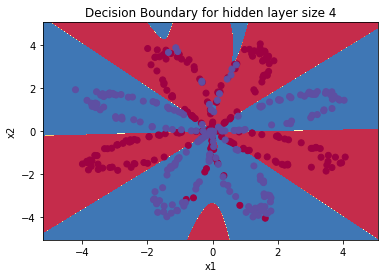

In [162]:
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [181]:
predictions=predict(parameters,X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')


Accuracy: 90%


In [182]:
list_hidden_layer=[1,2,3,4,8,10,20,50]
for i,n_h in enumerate(list_hidden_layer):
  parameters=nn_model(X,Y,n_h,num_iterations=5000)
  predictions=predict(parameters,X)
  print ('Accuracy',"of hidden_layer", n_h,": %d" % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')


Accuracy of hidden_layer 1 : 67%
Accuracy of hidden_layer 2 : 67%
Accuracy of hidden_layer 3 : 90%
Accuracy of hidden_layer 4 : 90%
Accuracy of hidden_layer 8 : 90%
Accuracy of hidden_layer 10 : 90%
Accuracy of hidden_layer 20 : 90%
Accuracy of hidden_layer 50 : 90%
